# Integrative Analysis of Multi-omic Data

Piero Palacios Bernuy [](https://orcid.org/0000-0001-6729-4080)  
April 30, 2024

This document is part of a series of the analysis of Omics data. Especifically, here is showed how to analyze bulk RNA-Seq data with Bioconductor packages. Also, it’s showcased how to make plots of the RNA data in the context of differentially gene expression and gene-sets.

## 1 Introduction

## 2 GWAS Catalog with a ChIP-Seq Experiment

Here, we are gonna analyze the relation between transcription factor binding (ESRRA binding data) from a ChIP-Seq experiment and the genome-wide associations between DNA variants and phenotypes like diseases. For this task, we are gonna use a the `gwascat` package distributed by the **EMBL** (European Molecular Biology Laboratories).

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

gwascat loaded.  Use makeCurrentGwascat() to extract current image.
 from EBI.  The data folder of this package has some legacy extracts.

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min

Loading required package: S4Vectors
Loading required package: stats4

Attaching package: 'S4Vectors'

The following objects are masked from 'package:lubridate':

    second, second<-

The following objects are masked from 'package:dplyr

Loading required package: GenomicRanges
Loading required package: rtracklayer

Loading required package: Homo.sapiens
Loading required package: AnnotationDbi

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Attaching package: 'AnnotationDbi'

The following object is masked from 'package:dplyr':

    select

Loading required package: OrganismDbi

Loading required package: GenomicFeatures

Loading required package: GO.db

Loading required package: org.Hs.eg.db

Loading required package: TxDb.Hsapiens.UCSC.hg19.knownGene

First, we need to download the data, keep the 24 chromosomes (from 1 to Y) and, specify the sequence information from the GRCh38 human genome annotation.

In [ ]:
gwcat = get_cached_gwascat()

gg = gwcat |> as_GRanges()

dropping 45505 records that have NA for CHR_POS

1950 records have semicolon in CHR_POS; splitting and using first entry.

3265 records have ' x ' in CHR_POS indicating multiple SNP effects, using first.

Now, let’s plot a karyogram that will show the SNP’s identified with significant associations with a phenotype. The SNP’s in the GWAS catalog have a stringent criterion of significance and there has been a replication of the finding from a independent population.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

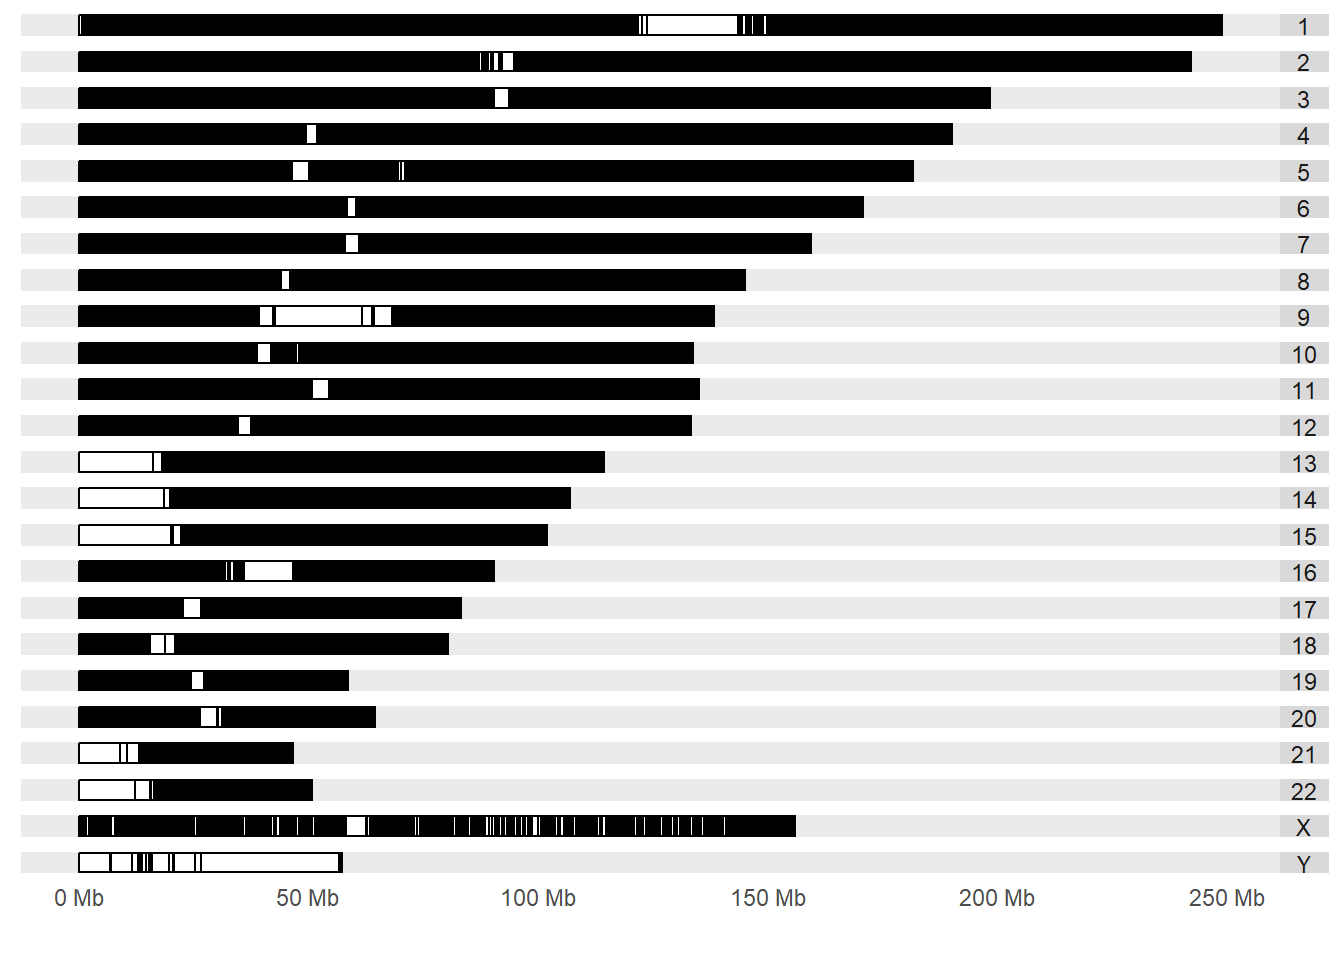

In [ ]:
ggbio::autoplot(gg, layout="karyogram")

We can see the peak data as a `GRanges` object:

In [ ]:
data("GM12878")

GM12878

GRanges object with 1873 ranges and 7 metadata columns:
         seqnames            ranges strand |      name     score       col
            <Rle>         <IRanges>  <Rle> | <numeric> <integer> <logical>
     [1]     chrX   1509355-1512462      * |         5         0      <NA>
     [2]     chrX 26801422-26802448      * |         6         0      <NA>
     [3]    chr19 11694102-11695359      * |         1         0      <NA>
     [4]    chr19   4076893-4079276      * |         4         0      <NA>
     [5]     chr3 53288568-53290767      * |         9         0      <NA>
     ...      ...               ...    ... .       ...       ...       ...
  [1869]    chr19 11201120-11203985      * |      8701         0      <NA>
  [1870]    chr19   2234920-2237370      * |       990         0      <NA>
  [1871]     chr1 94311336-94313543      * |      4035         0      <NA>
  [1872]    chr19 45690614-45691210      * |     10688         0      <NA>
  [1873]    chr19   6110100-6111252      * |

If we see the bottom of the `GRanges` table, this experiment have the hg19 annotation from the human genome. To work on the GRCh38 annotation we need to lift-over with a `.chain` file. For this we can use the `AnnotationHub` package.

In [ ]:
library(AnnotationHub)

Loading required package: BiocFileCache

Loading required package: dbplyr


Attaching package: 'dbplyr'

The following objects are masked from 'package:dplyr':

    ident, sql


Attaching package: 'AnnotationHub'

The following object is masked from 'package:Biobase':

    cache

The following object is masked from 'package:rtracklayer':

    hubUrl

AnnotationHub with 1 record
# snapshotDate(): 2023-10-23
# names(): AH14150
# $dataprovider: UCSC
# $species: Homo sapiens
# $rdataclass: ChainFile
# $rdatadateadded: 2014-12-15
# $title: hg19ToHg38.over.chain.gz
# $description: UCSC liftOver chain file from hg19 to hg38
# $taxonomyid: 9606
# $genome: hg19
# $sourcetype: Chain
# $sourceurl: http://hgdownload.cse.ucsc.edu/goldenpath/hg19/liftOver/hg19To...
# $sourcesize: NA
# $tags: c("liftOver", "chain", "UCSC", "genome", "homology") 
# retrieve record with 'object[["AH14150"]]' 

loading from cache

In [ ]:
GM12878 <- liftOver(GM12878, chain) |> 
  unlist()

seqlevelsStyle(GM12878) <- "NCBI"

seqinfo(GM12878) <- si.hs.38


seqlevelsStyle(GM12878) <- "UCSC"
seqlevelsStyle(gg) <- "UCSC"

We can find overlaps between the GWAS catalog and the ESRRA ChIP-Seq experiment but, there is a problem; the GWAS catalog is a collection of intervals that reports all significant SNPs and there can be duplications of SNPs associated to multiple phenotypes or the same SNP might be found for the same phenotype in different studies.

We can see the duplications with the `reduce` function from `IRanges` package:

In [ ]:
# duplicated loci
length(gg) - length(reduce(gg))

[1] 261160

We can see that there are `261160` duplicated loci. Let’s find the overlap between the *reduced* catalog and the ChIP-Seq experiment:

In [ ]:
#
fo = findOverlaps(GM12878, reduce(gg))
fo

Hits object with 613 hits and 0 metadata columns:
        queryHits subjectHits
        <integer>   <integer>
    [1]         6      237757
    [2]         9      221130
    [3]        12       25060
    [4]        15      104699
    [5]        15      104700
    ...       ...         ...
  [609]      1928      246305
  [610]      1929      244698
  [611]      1929      244699
  [612]      1931      250380
  [613]      1931      250381
  -------
  queryLength: 1932 / subjectLength: 268560

We can see 613 hits. Then, we are gonna eobtain the ranges from those hits, retrieve the phenotypes (DISEASE/TRAIT) and show the top 20 most common phenotypes with association to SNPs that lies on the ESRRA binding peaks.

In [ ]:
over_ranges <- reduce(gg)[subjectHits(fo)]


ii <- over_ranges |> 
  as.data.frame() |> 
  GenomicRanges::makeGRangesListFromDataFrame()


phset = lapply(ii, function(x){
  
  # print(glue::glue("On range: {x}"))
  unique(gg[which(gg %over% x)]$"DISEASE/TRAIT")
  
})

gwas_on_peaks <- phset |> 
    enframe() |> 
    unnest(value) |> 
    dplyr::count(value) |> 
    slice_max(n, n=20)


p <- gwas_on_peaks |> 
  mutate(value = fct_reorder(value,n)) |> 
  ggplot(aes(n,value, fill=value))+
  geom_col() +
  theme(legend.position = "none") +
  paletteer::scale_fill_paletteer_d("khroma::smoothrainbow") +
  theme_minimal()

htmltools::tagList(list(plotly::ggplotly(p)))

Distinct phenotypes identified on the peaks:

In [ ]:
length(phset)

[1] 613

Now, how to do the inference of these phenotype on peaks of these b cells? We can use permutation on the genomic positions to test if the number of phenotypes found is due to chance or not.

In [ ]:
library(ph525x)

Loading required package: png

Loading required package: grid

Loading required package: VariantAnnotation

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'

The following objects are masked from 'package:Biobase':

    anyMissing, rowMedians

The following object is masked from 'package:dplyr':

    count


Attaching package: 'MatrixGenerics'

The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeig

The following object is masked from 'package:Biobase':

    rowMedians

Loading required package: SummarizedExperiment

Loading required package: Rsamtools

Loading required package: Biostrings

Loading required package: XVector


Attaching package: 'XVector'

The following object is masked from 'package:purrr':

    compact


Attaching package: 'Biostrings'

The following object is masked from 'package:grid':

    pattern

The following object is masked from 'package:base':

    strsplit


Attaching package: 'VariantAnnotation'

The following object is masked from 'package:stringr':

    fixed

The following object is masked from 'package:base':

    tabulate

[1] 0

## 3 Explore the TCGA

Please check the dedicated script (top left) to see how to explore and get insights from the TCGA (The Cancer Genome Atlas) database.

## 4 Conclusion

## References